# Import Data and Metadata

In [2]:
# import modules
import pandas as pd

In [3]:
# import data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
4714,MADAG 50:9+NH4 (-FA 18:1 (NH4)),2847.0,2695.0,2948.0,2478.0,1110.0,1032.0,1010.0,947.0,4019.0000,...,0.0000,863.0000,1670.0000,1830.0,1586.0,1716.0000,10190.0,10937.0,11076.0,10805.0
3804,HexCer 30:4;2 (LCB 17:0;2-2H2O),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3013,...,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
3180,SGalCer 26:0;3 (LCB 18:0;2-2H2O),0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0000,...,1.6597,29.8947,12.2177,0.0,0.0,7.7051,0.0,0.0,0.0,0.0


In [4]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
1656,NAPE 32:1+NH4 (-NAPE (22:5 NH4)),NAPE,32,1
1546,NAPE 36:6+NH4 (-NAPE (22:6 NH4)),NAPE,36,6
3328,GM2 42:0;2 (LCB 18:0;2-H2O),GM2,42,0


In [5]:
# import experiment metedata
df_exps = pd.read_csv('dataframes/pos_exps_df_meta.csv')
df_exps.sample(3)

,sample,protein
18,CERS2-1g_B,CERS2-1g
13,CERS2_mg-A.1,CERS2_mg
33,SPTLC_B.1,SPTLC


## Get Chain Lengths

We want to find the amounts of each chain length for each experiment

In [6]:
# merge with metadata to get chain lengths
dfa = df_meta[['Sample Name', 'Acyl Chain Length']].merge(df, on='Sample Name')

# find concentration of each chain length
lengths = dfa.groupby('Acyl Chain Length').sum()
lengths.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Acyl Chain Length,,,,,,,,,,,,,,,,,,,,,
10,0.0000,0.0000,0.0000,0.0000,21.6224,0.0000,234.6340,276.7446,0.0000,22.0000,...,40.0000,53.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,23.0000
12,35.0000,35.0000,56.9083,33.0000,32.0000,44.6469,96.8573,106.0000,0.0000,30.0000,...,22.0000,0.0000,0.0000,30.0,49.0000,57.0000,0.0000,0.0000,37.0000,0.0000
14,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.4020,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
16,101.0000,54.0000,56.0000,28.0000,3514.0802,3209.3048,2387.5640,2308.1189,42.0000,73.0000,...,2501.8477,2379.0624,38.0000,69.0,23.0000,83.0000,0.0000,0.0000,0.0000,0.0000
18,3151.6889,3196.6663,3517.1031,3100.7914,9804.0135,6799.5276,4619.7055,4772.9836,3882.7404,3969.9773,...,2950.9891,3296.1865,3545.4834,3870.7,3903.5885,3691.8628,5067.7189,4964.1132,3803.6267,3579.8054


In [36]:
# get chain lengths as fraction of total
total = lengths.values.sum()
lengths = lengths.div(total)

In [48]:
# get mean chain lengths for each protein
ptns = lengths.T.reset_index().rename(columns={'index': 'sample'}).merge(df_exps, on='sample')
ptns = ptns.groupby('protein').mean().T.reset_index().rename(columns={'index':'Acyl Chain Length'})
ptns.head()

protein,Acyl Chain Length,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,RAJU,SPTLC,UGCG,WT
0,10,0.000000e+00,1.249096e-06,5.155735e-08,0.000000e+00,1.640461e-08,0.000000,0.000000e+00,0.000000e+00,7.475321e-07,0.000000e+00,5.390087e-08
1,12,3.747477e-07,6.550226e-07,1.382674e-07,2.226340e-07,0.000000e+00,0.000000,5.155735e-08,0.000000e+00,1.101452e-07,3.187182e-07,8.671009e-08
2,14,0.000000e+00,3.609483e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,16,5.601003e-07,2.676077e-05,6.953477e-07,2.460692e-07,5.856033e-06,0.000013,4.331703e-07,3.046571e-07,2.265275e-05,4.991689e-07,0.000000e+00
4,18,3.038661e-05,6.092258e-05,4.434866e-05,4.013829e-05,3.150945e-05,0.000052,1.307011e-05,2.390386e-06,2.845828e-05,3.518001e-05,4.081295e-05


# Graph
We want to graph the distribution of chain lengths for each experiment

In [49]:
# import modules
import matplotlib.pyplot as plt
import altair as alt

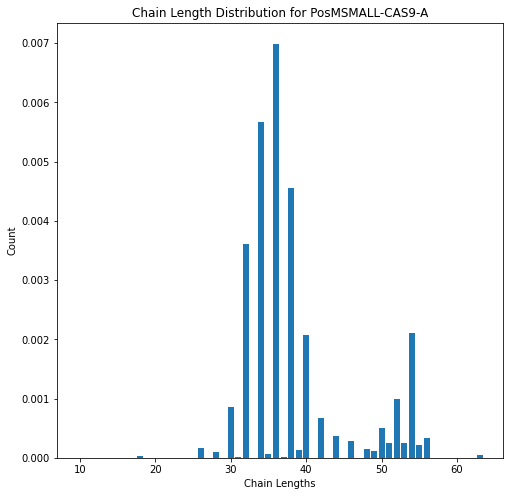

In [50]:
plt.figure(figsize=(8,8))
plt.bar(
    x=lengths.index,
    height=lengths.iloc[:,0]
)

plt.title('Chain Length Distribution for PosMSMALL-CAS9-A')
plt.xlabel('Chain Lengths')
plt.ylabel('Count')
plt.show()

In [51]:
# move 'Acyl Chain Length' from index into column so altair can access
l = lengths.reset_index()

a = alt.Chart(l).mark_bar(color='#008000', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAS9-A:Q').title('Concentration')
).properties(
    title='CAS9-A'
)

b = alt.Chart(l).mark_bar(opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAV_A:Q').title('Concentration'),
).properties(
    title=('CAV_A')
)

c = alt.Chart(l).mark_bar(opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAVIN_A')
).properties(
    title='CAVIN_A'
)

a | b | c

alt.HConcatChart(...)

In [52]:
# get chain length distributions for CAS9
l_4 = l.iloc[:,:5].melt('Acyl Chain Length', var_name='exps')

In [53]:
alt.Chart(l_4).mark_bar().encode(
    x='Acyl Chain Length:O',
    xOffset='exps',
    y='value:Q',
    color='exps:N',
    tooltip=['Acyl Chain Length', 'exps', 'value']
).properties(
    width=600,
    height=400,
    title="Chain Length Distribution for CAS9"
)

alt.Chart(...)

In [54]:
# get chain length distributions across all proteins
ptns_long = ptns.melt('Acyl Chain Length', var_name='protein')

In [61]:
click = alt.selection_point(fields=['protein'])

grouped = alt.Chart(ptns_long).mark_bar().encode(
    x='Acyl Chain Length:O',
    xOffset='protein',
    y=alt.Y('value:Q').title('mean value'),
    color= alt.condition(click, alt.Color('protein:N').scale(scheme='category20'), alt.value('lightgray')),
    tooltip=['Acyl Chain Length', 'protein', 'value']
).properties(
    width=3000,
    title="Average Chain Length Distributions"
).add_params(
    click
)

grouped

alt.Chart(...)

In [57]:
a = alt.Chart(ptns).mark_bar(color='#440154', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAS9:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'CAS9']
).properties(
    title='CAS9'
)

b = alt.Chart(ptns).mark_bar(color='#482173', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAV:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'CAV']
).properties(
    title='CAV'
)

c = alt.Chart(ptns).mark_bar(color='#433e85', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAVIN:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'CAVIN']
).properties(
    title='CAVIN'
)

d = alt.Chart(ptns).mark_bar(color='#38588c', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2-1g:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'CERS2-1g']
).properties(
    title='CERS2-1g'
)

e = alt.Chart(ptns).mark_bar(color='#2d708e', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2_mg:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'CERS2_mg']
).properties(
    title='CERS2_mg'
)

f = alt.Chart(ptns).mark_bar(color='#25858e', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS5:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'CERS5']
).properties(
    title='CERS5'
)

g = alt.Chart(ptns).mark_bar(color='#1e9b8a', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('Flot2:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'Flot2']
).properties(
    title='Flot2'
)

h = alt.Chart(ptns).mark_bar(color='#2ab07f', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('RAJU:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'RAJU']
).properties(
    title='RAJU'
)

i = alt.Chart(ptns).mark_bar(color='#52c569', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('SPTLC:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'SPTLC']
).properties(
    title='SPTLC'
)

j = alt.Chart(ptns).mark_bar(color='#86d549', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('UGCG:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'UGCG']
).properties(
    title='UGCG'
)

k = alt.Chart(ptns).mark_bar(color='#c2df23', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('WT:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'WT']
).properties(
    title='WT'
)

layered = a + b + c + d + e + f + g + h + i + j + k
layered

alt.LayerChart(...)

In [58]:
a = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAS9:Q').title('Concentration'),
    tooltip=['Acyl Chain Length', 'CAS9']
).properties(
    title='CAS9'
)

b = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAV:Q').title('Concentration').scale(domain=[0,.008]),
    tooltip=['Acyl Chain Length', 'CAV']
).properties(
    title='CAV'
)

c = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAVIN:Q').title('Concentration').scale(domain=[0,.008]),
    tooltip=['Acyl Chain Length', 'CAVIN']
).properties(
    title='CAVIN'
)

d = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2-1g:Q').title('Concentration').scale(domain=[0,.008]),
    tooltip=['Acyl Chain Length', 'CERS2-1g']
).properties(
    title='CERS2-1g'
)

e = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2_mg:Q').title('Concentration').scale(domain=[0,.008]),
    tooltip=['Acyl Chain Length', 'CERS2_mg']
).properties(
    title='CERS2_mg'
)

f = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS5:Q').title('Concentration').scale(domain=[0,.008]),
    tooltip=['Acyl Chain Length', 'CERS5']
).properties(
    title='CERS5'
)

g = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('Flot2:Q').title('Concentration').scale(domain=[0,.008]),
    tooltip=['Acyl Chain Length', 'Flot2']
).properties(
    title='Flot2'
)

h = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('RAJU:Q').title('Concentration').scale(domain=[0,.008]),
    tooltip=['Acyl Chain Length', 'RAJU']
).properties(
    title='RAJU'
)

i = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('SPTLC:Q').title('Concentration').scale(domain=[0,.008]),
    tooltip=['Acyl Chain Length', 'SPTLC']
).properties(
    title='SPTLC'
)

j = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('UGCG:Q').title('Concentration').scale(domain=[0,.008]),
    tooltip=['Acyl Chain Length', 'UGCG']
).properties(
    title='UGCG'
)

k = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('WT:Q').title('Concentration').scale(domain=[0,.008]),
    tooltip=['Acyl Chain Length', 'WT']
).properties(
    title='WT'
)

chain_lengths = (a | b | c) & (d | e | f) & (g | h | i) & (j | k)
chain_lengths

alt.VConcatChart(...)

# Save Graphs

In [96]:
# chain_lengths.save('graphs/pos_mode_whole_dataset/ChainLengthByProtein_SideBySide_interactive.html')

# grouped.save('graphs/pos_mode_whole_dataset/ChainLengthByProtein_GroupedBarGraph_interactive.html')